In [2]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sg

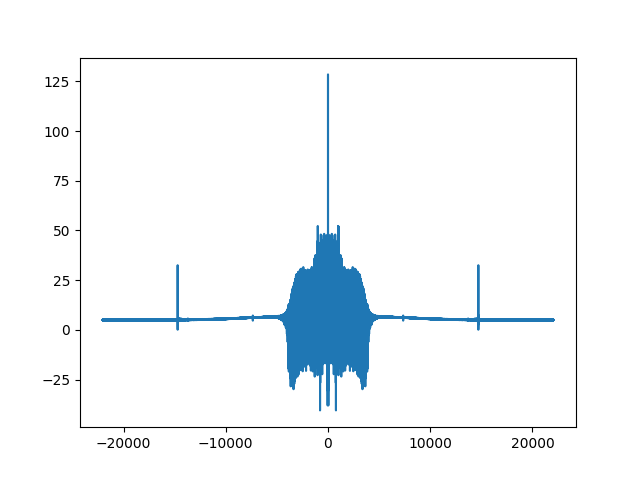

In [3]:
samples, Fs = sf.read('input.wav')
Fc = 7000
deviation = 3000
# print(Fc/Fs)


def spectre(samples):
    %matplotlib widget
    for s in samples:
        plt.plot(np.linspace(-Fs/2, Fs/2, len(s)), np.fft.fftshift(20*np.log10(np.abs(np.fft.fft(s)))))
    plt.show()
    
def signal(samples):
    %matplotlib widget
    plt.plot(np.arange(len(samples)) / Fs, samples)
    plt.show()
    
spectre([samples])
    

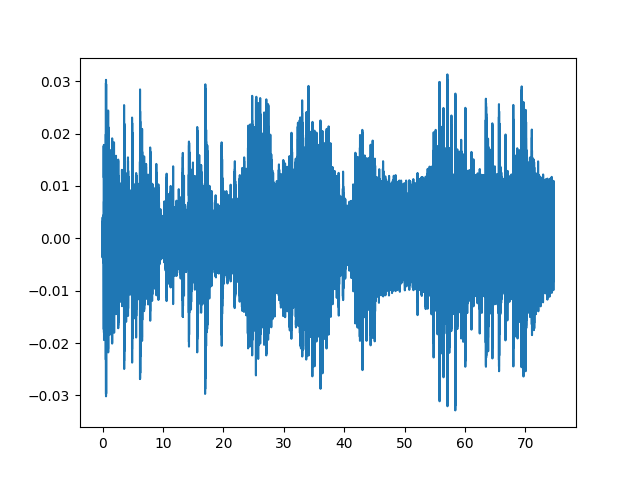

In [4]:
samples = samples[Fs * 3 : -1]
samples -= np.sum(samples) / len(samples)
signal(samples)

In [5]:
s = np.zeros(len(samples) * 2)

N = len(samples)
for i in range(N):
    s[i] = samples[i]

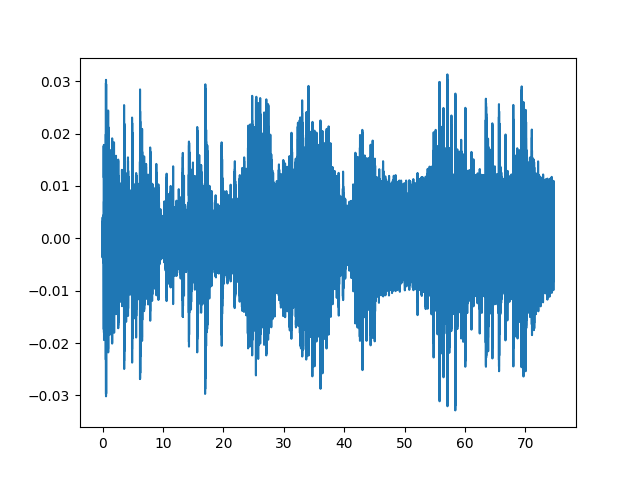

In [7]:
spectr = np.fft.fft(s)
s = (np.fft.ifft(spectr))
s = s[:N]
# signal(np.abs(np.imag(s)) / np.abs(np.real(s)))
signal(np.real(s))



In [8]:
import sounddevice as sd
sd.play(np.real(s), Fs)

In [9]:
sd.stop()

In [ ]:
def mult_by_exp(samples, Fc, Fs):
    return samples*np.exp(-1j * np.arange(0, len(samples)) * 2 * np.pi * Fc / Fs)

s1 = mult_by_exp(samples, Fc, Fs)
spectre([s1, samples])

In [ ]:
b,a = sg.iirdesign(deviation, 5 * deviation, 1, 100, fs=Fs)
s2 = sg.lfilter(b, a, s1)

In [ ]:
spectre([s2])

In [ ]:
s3 = np.angle(s2)
%matplotlib widget
plt.plot(s3[1000:10000010])
plt.show()

In [ ]:
def diff(samples):
    res = np.zeros(len(samples))
    for i in range(len(samples)):
        res[i] = samples[i] - samples[i - 1]
    return res

s4 = diff(s3)
spectre([s4])

In [ ]:
%matplotlib widget
plt.plot(s4)
plt.show()

In [ ]:
def fix_diff(sample):
    eps = 1e-6
    res = np.zeros(len(sample))
    for i in range(len(sample)):
        if sample[i] > np.pi - eps:
            res[i] = sample[i] - 2 * np.pi
        elif sample[i] < -np.pi + eps:
            res[i] = sample[i] + 2 * np.pi
        else:
            res[i] = sample[i]
    return res

s5 = fix_diff(s4)
# s5 = s4
signal(s5)

In [ ]:
spectre([s5])

In [ ]:
def amplify(samples, dev, Fs):
    return samples * Fs / dev

s6 = amplify(s5, deviation, Fs)

In [ ]:
import sounddevice as sd
sd.play(20 * s6, Fs)

In [ ]:
sd.stop()